In [1]:
import pandas as pd
df = pd.read_csv("tips.csv")
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [2]:
#Xoá cột Unnamed: 0
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df.shape

(244, 7)

In [4]:
#Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
df.info()
# Kiểm tra số các giá trị phân biệt
df.nunique()
# Đếm các giá trị khác nhau của cột size
df['size'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64

In [5]:
#Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [6]:
(df['sex'].value_counts() / df['sex'].count()) *100

sex
Male      64.344262
Female    35.655738
Name: count, dtype: float64

In [7]:
# Sử dụng group by của series
df['sex'].groupby(df['sex']=='Male').count()

sex
False     87
True     157
Name: sex, dtype: int64

In [8]:
# Định nghĩa hàm
def thong_ke_thuoc_tinh(data, att):
    '''
        data: a DataFrame
        att: a string of an attribute of data
    '''
    print('Thống kê số lượng: ')
    print(data[att].value_counts())
    
    print('\n\nTỷ lệ: ')
    tyle = round((data[att].value_counts() / data[att].count()) * 100, 2)
    print(tyle)

In [9]:
#Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
thong_ke_thuoc_tinh(df, 'smoker')

Thống kê số lượng: 
smoker
No     151
Yes     93
Name: count, dtype: int64


Tỷ lệ: 
smoker
No     61.89
Yes    38.11
Name: count, dtype: float64


In [10]:
# Sử dụng group by
df['smoker'].groupby(df['smoker']=='Yes').count()

smoker
False    151
True      93
Name: smoker, dtype: int64

In [11]:
(df['smoker'].groupby(df['smoker']=='Yes').count() / df['smoker'].count()) * 100 

smoker
False    61.885246
True     38.114754
Name: smoker, dtype: float64

In [12]:
thong_ke_thuoc_tinh(df, 'day')

Thống kê số lượng: 
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64


Tỷ lệ: 
day
Sat     35.66
Sun     31.15
Thur    25.41
Fri      7.79
Name: count, dtype: float64


In [13]:
df['day'].value_counts().sort_values(ascending=True).index[1]

'Thur'

In [14]:
df['day'].value_counts().sort_values(ascending=True).values[0]

19

In [15]:
a=df.groupby(['day','size']).size()
a
#a.index[0][0]

day   size
Fri   1        1
      2       16
      3        1
      4        1
Sat   1        2
      2       53
      3       18
      4       13
      5        1
Sun   2       39
      3       15
      4       18
      5        3
      6        1
Thur  1        1
      2       48
      3        4
      4        5
      5        1
      6        3
dtype: int64

In [16]:
a.values[5]

53

In [17]:
for date in a.index.unique("day"):
    b = a.loc[date]
    tong = 0
    for i in b.index:
        print(i)
        print(b[i])
        tong = tong + i*b[i] 
    print (tong)

1
1
2
16
3
1
4
1
40
1
2
2
53
3
18
4
13
5
1
219
2
39
3
15
4
18
5
3
6
1
216
1
1
2
48
3
4
4
5
5
1
6
3
152


In [18]:
#Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
thong_ke_thuoc_tinh(df, 'time')

Thống kê số lượng: 
time
Dinner    176
Lunch      68
Name: count, dtype: int64


Tỷ lệ: 
time
Dinner    72.13
Lunch     27.87
Name: count, dtype: float64


In [19]:
#Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
thong_ke_thuoc_tinh(df, 'size')

Thống kê số lượng: 
size
2    156
3     38
4     37
5      5
1      4
6      4
Name: count, dtype: int64


Tỷ lệ: 
size
2    63.93
3    15.57
4    15.16
5     2.05
1     1.64
6     1.64
Name: count, dtype: float64


In [20]:
#Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
print('Số lượng khách trung bình nhà hàng phục vụ: ', round(df['size'].mean(), 2))


Số lượng khách trung bình nhà hàng phục vụ:  2.57


In [21]:
# Yếu tố ảnh hưởng đến tiền tip
# 1.Tỷ lệ được tiền tip của nhà hàng là bao nhiêu
df[df['tip'] == 0].count()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [22]:
n = df['tip'].count()
tyle_tip = ((n - df.loc[df['tip']==0, ['tip']].count()) / n) * 100

print(f'Ty le tip: {tyle_tip} ')

Ty le tip: tip    100.0
dtype: float64 


In [23]:
# Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
round(df['tip'].sum() / df['total_bill'].sum(), 3)

0.152

In [24]:
#Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
tip_by_gender = df.groupby('sex')['tip'].sum()
tip_count_by_gender = df.groupby('sex')['tip'].count()

print("Tổng tiền tip theo giới tính:")
print(tip_by_gender)

print("\nTổng số lần tip (số lượng bữa ăn) theo giới tính:")
print(tip_count_by_gender)


Tổng tiền tip theo giới tính:
sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

Tổng số lần tip (số lượng bữa ăn) theo giới tính:
sex
Female     87
Male      157
Name: tip, dtype: int64


In [25]:
#Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
tip_by_smoker = df.groupby('smoker')['tip'].sum()
tip_count_by_smoker = df.groupby('smoker')['tip'].count()

print("Tổng tiền tip theo việc hút thuốc (smoker):")
print(tip_by_smoker)

print("\nTổng số lần tip (số lượng bữa ăn) theo việc hút thuốc (smoker):")
print(tip_count_by_smoker)


Tổng tiền tip theo việc hút thuốc (smoker):
smoker
No     451.77
Yes    279.81
Name: tip, dtype: float64

Tổng số lần tip (số lượng bữa ăn) theo việc hút thuốc (smoker):
smoker
No     151
Yes     93
Name: tip, dtype: int64


In [26]:
#Thống kê tổng số tiền tip nhận được theo ngày.
tip_by_day = df.groupby('day')['tip'].sum()
print(tip_by_day)


day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


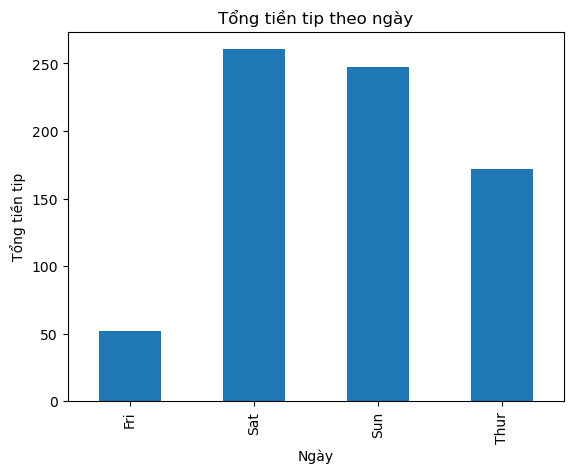

In [27]:
#Vẽ đồ thị thể hiện tổng tiền tip theo ngày
import matplotlib.pyplot as plt

tip_by_day = df.groupby('day')['tip'].sum()
tip_by_day.plot(kind='bar', title='Tổng tiền tip theo ngày')
plt.xlabel('Ngày')
plt.ylabel('Tổng tiền tip')
plt.show()


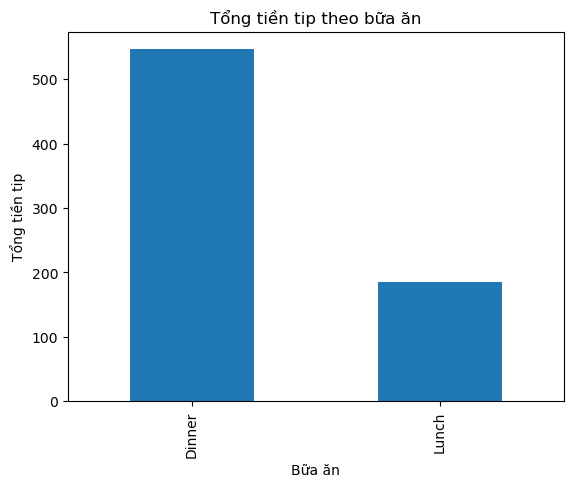

In [28]:
# Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
tip_by_time = df.groupby('time')['tip'].sum()
tip_by_time.plot(kind='bar', title='Tổng tiền tip theo bữa ăn')
plt.xlabel('Bữa ăn')
plt.ylabel('Tổng tiền tip')
plt.show()


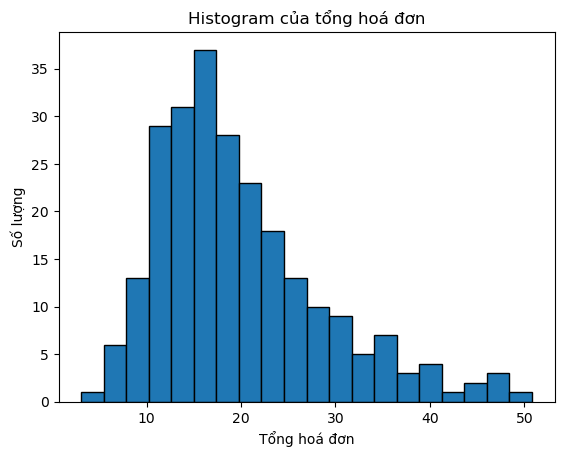

In [29]:
#Vẽ đồ thị histogram của tổng hoá đơn
plt.hist(df['total_bill'], bins=20, edgecolor='k')
plt.title('Histogram của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn')
plt.ylabel('Số lượng')
plt.show()

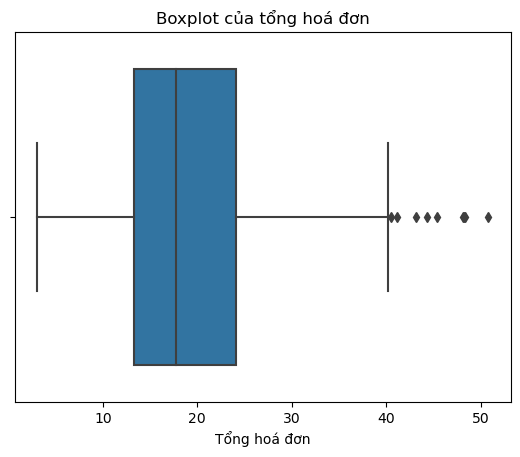

In [30]:
# Vẽ đồ thị boxplot của tổng hoá đơn
import seaborn as sns

sns.boxplot(x='total_bill', data=df)
plt.title('Boxplot của tổng hoá đơn')
plt.xlabel('Tổng hoá đơn')
plt.show()


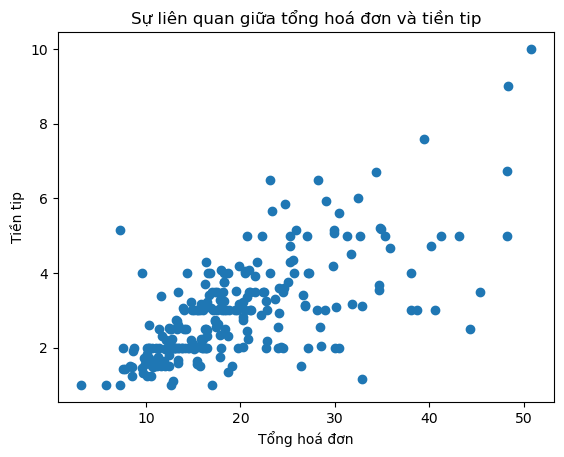

In [31]:
# Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
plt.scatter(df['total_bill'], df['tip'])
plt.title('Sự liên quan giữa tổng hoá đơn và tiền tip')
plt.xlabel('Tổng hoá đơn')
plt.ylabel('Tiền tip')
plt.show()

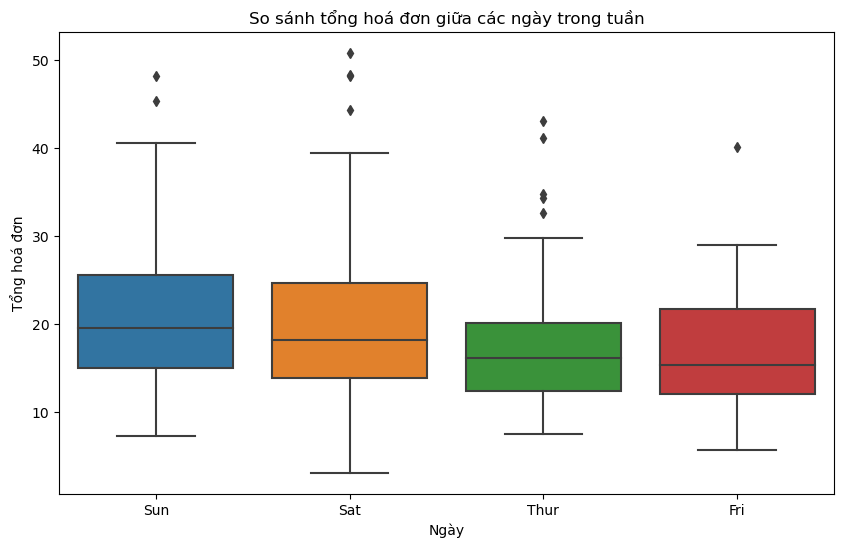

In [32]:
#So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('So sánh tổng hoá đơn giữa các ngày trong tuần')
plt.xlabel('Ngày')
plt.ylabel('Tổng hoá đơn')
plt.show()


In [ ]:
1.Tổng hoá đơn: Có sự tương quan dương giữa tổng hoá đơn và tiền tip. Khách hàng thường trả tiền tip cao 
hơn khi hóa đơn lớn hơn.

2.Bữa ăn: Dường như khách hàng thường trả tiền tip cao hơn trong bữa tối (Dinner) so với bữa trưa (Lunch).

3.Ngày trong tuần: Trong số các ngày trong tuần, thứ bảy (Saturday) và chủ nhật (Sunday) có sự tăng của tiền 
tip so với các ngày khác.

4.Số lượng người: Số lượng người trong bữa ăn cũng ảnh hưởng đến tiền tip. Bữa ăn cho nhiều người thường có 
tiền tip lớn hơn.

5.Giới tính: Tính toán tiền tip dựa trên giới tính không phản ánh rõ ràng ảnh hưởng đến tiền tip.

6.Hút thuốc: Có sự tương quan dương nhỏ giữa việc hút thuốc và tiền tip, nhưng sự ảnh hưởng này không lớn. 